# **Portada Dinosaurios**
## Algoritmo K-Means Clustering
K-means es un algoritmo de agrupamiento. Con k-means hay que especificar la cantidad de grupos que quiero generar con anticipación. Hay algoritmos que seleccionan automáticamente el valor óptimo de k.

El objetivo es dividir x puntos de datos en n grupos. Cada uno de los puntos de datos se asignará a un grupo con la media más cercana, la cual se llamará "centroide".

En este ejercicio, voy a ver las intensidades de píxeles en las 3 capas RGB en mi imagen de dinosaurios.

Los píxeles que pertenezcan a un grupo concreto serán más similares en color que los píxeles que pertenezcen a otro grupo.

### Importo librerias

In [142]:

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import cv2


### Defino centroides/ clusters que quiero obtener con el algoritmo K-means

In [143]:
# Defino 8 clusters
clusters = 8

### Importo imagen

In [144]:
# imread : función para leer datos en archivos de imágenes
mi_portada = cv2.imread ('portada_eda.jpg') 
mi_portada.shape
#cv2.imshow('Mi portada', mi_portada)

(532, 916, 3)

In [145]:
# Quiero ver mis matrices de las 3 capas de color
nportada = np.array (mi_portada, dtype = np.float32) /255.0 #Convertir a np
(b,g,r) = cv2.split(nportada)
print(b,g,r)


[[0.9098039  0.9411765  0.9764706  ... 0.9607843  0.95686275 0.9529412 ]
 [0.9882353  1.         1.         ... 0.9529412  0.9529412  0.9529412 ]
 [0.93333334 0.9764706  0.9882353  ... 0.96862745 0.9647059  0.9607843 ]
 ...
 [0.21176471 0.38039216 0.43137255 ... 0.07450981 0.07450981 0.13725491]
 [0.21176471 0.2901961  0.36862746 ... 0.01960784 0.06666667 0.13333334]
 [0.19215687 0.20392157 0.27450982 ... 0.05098039 0.09411765 0.13333334]] [[0.92941177 0.9607843  0.972549   ... 0.9764706  0.972549   0.96862745]
 [1.         1.         1.         ... 0.96862745 0.96862745 0.96862745]
 [0.9411765  0.9843137  0.99215686 ... 0.98039216 0.9764706  0.972549  ]
 ...
 [0.29803923 0.46666667 0.50980395 ... 0.05490196 0.05490196 0.11764706]
 [0.29803923 0.3764706  0.44705883 ... 0.         0.04705882 0.11372549]
 [0.2784314  0.2901961  0.3529412  ... 0.03137255 0.07450981 0.11372549]] [[0.87058824 0.9019608  0.93333334 ... 0.68235296 0.6784314  0.6745098 ]
 [0.9372549  0.9529412  0.95686275 ... 

In [146]:
# SUPER IMPORTANTE PARA ORDENAR LAS 3 CAPAS RED, GREEN & BLUE
image = cv2.cvtColor(mi_portada, cv2.COLOR_BGR2RGB)


In [147]:
image.shape

(532, 916, 3)

### Aqui está la portada de los dinosaurios

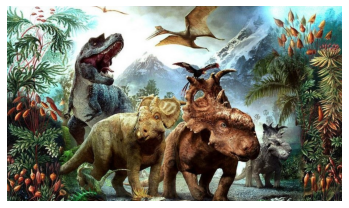

In [148]:
# Muestro la imagen
plt.figure()
plt.axis("off")
plt.imshow(image);

### Reshape de la imagen para obtener lista de pixeles

In [149]:
# Tengo 3 matrices R, G y B: aplanar las columnas de pixeles
image = image.reshape((image.shape[0] * image.shape[1], 3)) 

### Modelo K-Means con los clusters definidos

In [150]:
clt = KMeans(n_clusters = clusters, random_state=42)
kmeans = clt.fit(image)

In [151]:
clusters = clt.cluster_centers_

### Estos son mis clusters

In [152]:

centroides = pd.DataFrame(clusters, columns=['Red', 'Green', 'Blue'])
centroides

,Red,Green,Blue
0,124.264000,86.913024,55.522322
1,174.847817,204.150411,198.295580
2,91.892049,110.008019,96.936198
3,235.022703,248.539525,243.925029
4,178.487795,144.888889,102.193389
5,62.348912,59.930381,42.809267
6,28.538110,21.463953,12.514314
7,131.523019,154.476777,147.178717


### Qué peso tiene cada uno de los clusters

In [153]:
def histograma_centroides(clt):
    '''
    Función que en base a los k definidos, crea un histograma según la cantidad de pixeles de cada cluster
    '''
    numLabels = np.arange(0, len(np.unique(clt.labels_)) + 1)
    (hist, _) = np.histogram(clt.labels_, bins = numLabels)
    # normalizo histograma para que sume 1
    hist = hist.astype("float")
    hist /= hist.sum()
    
    return hist

In [154]:
def plot_colors(hist, centroids):
    '''
    Función para preparar el gráfico de barras que mostrará la frecuencia relativa de cada color centroide
    '''
    bar = np.zeros((50, 300, 3), dtype = "uint8")
    startX = 0
    # bucle para iterar sobre el porcentaje y color de cada cluster
    for (percent, color) in zip(hist, centroids):
        # porcentaje de cada cluster
        endX = startX + (percent * 300)
        cv2.rectangle(bar, (int(startX), 0), (int(endX), 50),
            color.astype("uint8").tolist(), -1)
        startX = endX
    
    return bar

In [155]:
hist = histograma_centroides(clt)
hist

array([0.08336959, 0.10756353, 0.11696818, 0.12008323, 0.06048281,
       0.18866763, 0.21221312, 0.1106519 ])

In [156]:
pesos = pd.DataFrame(hist*100, columns=['Peso del color sobre total imagen'])

### Tabla con clusters y su peso

In [157]:
concat = pd.concat([centroides, pesos], axis=1) 
nombres_clusters= ['Cluster1', 'Cluster2','Cluster3', 'Cluster4', 'Cluster5', 'Cluster6', 'Cluster7', 'Cluster8']
concat.index = list(nombres_clusters)
concat

,Red,Green,Blue,Peso del color sobre total imagen
Cluster1,124.264000,86.913024,55.522322,8.336959
Cluster2,174.847817,204.150411,198.295580,10.756353
Cluster3,91.892049,110.008019,96.936198,11.696818
Cluster4,235.022703,248.539525,243.925029,12.008323
Cluster5,178.487795,144.888889,102.193389,6.048281
Cluster6,62.348912,59.930381,42.809267,18.866763
Cluster7,28.538110,21.463953,12.514314,21.221312
Cluster8,131.523019,154.476777,147.178717,11.065190


### Visualizo los colores centroides y su peso que ha extraido el algoritmo

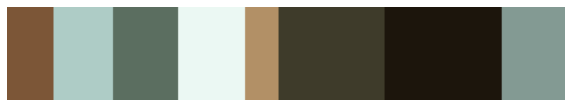

In [158]:
# Gráfico de barra con los colores centroides

bar = plot_colors(hist, clt.cluster_centers_)

plt.figure(figsize=(10, 8))
plt.axis("off")
plt.imshow(bar)
plt.xticks()
plt.show()

### **Estos 8 son mis colores dominantes de la portada de dinosaurios**

## Quiero modificar la imagen para ver cuanto cambia usando sólo los colores de mis centroides:

#### Cambio los pixeles al color de su centroide

In [159]:
segmented_img = kmeans.cluster_centers_[kmeans.labels_]

In [160]:
# Vuelvo a transformar la imagen con las dimensiones originales de su shape
segmented_img = segmented_img.reshape(mi_portada.shape)

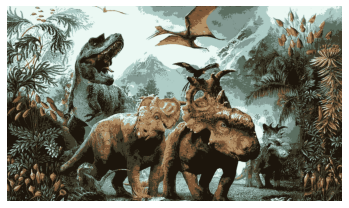

In [161]:
# Muestro imagen con K=8
plt.axis("off")
plt.imshow(segmented_img.astype('uint8'));

#### Como se puede apreciar pierde bastante, no serían suficientes los 8 centroides.

## Voy a probar con 12 clusters

In [162]:
clt2 = KMeans(n_clusters = 12, random_state=42)
kmeans2 = clt2.fit(image)

In [163]:
segmented_img2 = kmeans.cluster_centers_[kmeans.labels_]

In [164]:
# Vuelvo a transformar la imagen con las dimensiones originales de su shape
segmented_img2 = segmented_img2.reshape(mi_portada.shape)

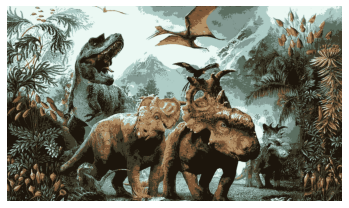

In [165]:
# Muestro imagen con k=12
plt.axis("off")
plt.imshow(segmented_img2.astype('uint8'));

#### Con 12 centroides ya se empezaria a obtener un resultado más aceptable

## Asi que esta si me la guardo

In [174]:
def create_seg_image(image, n_colors, save = False):
    
    X = image.reshape(-1, 3)
    kmeans = KMeans(n_clusters=n_colors, random_state=42).fit(X)
    segmented_img = kmeans.cluster_centers_[kmeans.labels_]
    segmented_img = segmented_img.reshape(mi_portada.shape)
    plt.axis("off")
    plt.imshow(segmented_img.astype(np.uint8))
    
    if save:
        plt.savefig("mi_imagen_modificada.jpg")

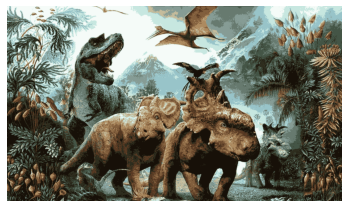

In [175]:
create_seg_image(image, 12, True)